# Term Project 

## (1) 주제 및 선정 이유

### 1-1) 주제 <br>

- SARIMA(Seasonal Autoregressive Integrated Moving Average) 모델을 이용한 서울시 내부순환로 통행속도 예측 <br>
    
### 1-2) 선정 이유 <br>

- 계량경제학 강의에서 배운 ARMA 모델을 실제 사례에 적용해보고자 함.
- 차량의 통행속도 데이터는 시계열 자료로, 위 모델을 적용하기에 적합하다고 판단함.
- 도시고속도로 외에 주간선도로, 보조간선도로, 기타도로 등이 더 있으나, 프로젝트의 수행 기간을 고려하여 내부순환로로 한정함. <br>

## (2) 이론 및 가설 <br>

### 2-1) 자기회귀모형: Autoregressive model(AR) <br><br>

자기회귀모형은 종속변수가 자신의 이전 시점의 값에 의해 결정되는 모형을 말한다. AR(1) 모형부터 AR(p)까지의 모형을 수식으로 표현하면, 아래와 같다. <br><br>

$$
\begin{align}
AR(1) ∶ Y_1 & = \alpha_1 Y_{(t-1)} + U_t \\
AR(2) ∶ Y_1 & = \alpha_1 Y_{(t-1)} + \alpha_2 Y_{(t-1)} + U_t \\
AR(3) ∶ Y_1 & = \alpha_1 Y_{(t-1)} + \alpha_2 Y_{(t-1)} + \alpha_3 Y_{(t-1)} + U_t\\
.\\
.\\
.\\
AR(p) : Y_1 & = \alpha_1 Y_{(t-1)} + \alpha_2 Y_{(t-1)} + \alpha_3 Y_{(t-1)} + ... + \alpha_p Y_{(t-p)} + U_t 
\end{align}
$$

### 2-2) 자기회귀모형의 평균과 분산 <br><br>



다음은 $AR(1)\ process$이다. <br><br>

$$
\begin{align}
Y_t & = \alpha Y_{(t-1)} + U_t \\
Y_{(t-1)} & = \alpha Y_{(t-2)} + U_{(t-1)} \\
Y_{(t-2)} & = \alpha Y_{(t-3)} + U_{(t-2)} \\
.\\
.\\
.\\
Y_t & = U_t + \alpha U_{(t-1)} + \alpha ^2 U_{(t-2)} + \alpha ^3 U_{(t-3)}\\
\end{align}
$$

<br>

한편 $Y_t$의 기댓값은 아래와 같다. <br><br>


$$
\begin{align}
E(Y_t) & = E(U_t) + \alpha E(U_{t-1}) + \alpha ^2 E(U_{t-2}) + \alpha ^3 E(U_{t-3}) + ... \\
\end{align}
$$

<br>

$U_t$는 iid white noise이기 때문에, <br><br>


$$
\begin{align}
E(Y_t) = 0
\end{align}
$$

<br>

이를 통해 $Y_t$의 분산을 구하면 아래와 같다. <br><br>

$$
\begin{align}
Var(Y_t) & = E[Y_t - E(Y_t)]^2 = E[Y_t^2] \\
E[Y_t^2] & = E[U_t + \alpha U_{t-1} + \alpha^2 U_{t-2} + \alpha^3 U{t-3} + ...]^2 \\
E(Y_t^2) & = \sigma^2 + \alpha^2\sigma^2 + \alpha^4\sigma^2 + ... \\\\
Var(Y_t) &= \frac{\sigma^2}{1 - \alpha^2}
\end{align}
$$
<br>

### 2-3) 자귀회귀모형의 공분산과 상관계수 <br>

$Y_t$의 공분산은 아래와 같다. <br><br>

$$
\begin{align}
Cov(Y_t, Y_{t-1}) & = E[Y_t - E(Y_t)][Y_{t-1} - E(Y_{t-1})] = E(Y_tY_{t-1}) \\
E(Y_tY_{t-1}) & = E[U_t + \alpha U_{t-1} + \alpha^2 U_{t-2} + ...][U_{t-1} + \alpha U_{t-2} + \alpha^2 U_{t-3} + ...] \\
E(Y_tY_{t-1}) & = \alpha\sigma^2 + \alpha^3\sigma^2 + \alpha^5\sigma^2 + \alpha^7\sigma^2 + ... \\\\
Cov(Y_t, Y_{t-1}) & = \frac{\alpha\sigma^2}{1 - \alpha^2} = \gamma_1
\end{align}
$$

<br>

이러한 방법으로 $t-2$, $t-3$, ..., $t-n$ 시점의 공분산을 구하면 아래와 같다.<br><br>

$$
\begin{align}
Var(Y_t) & = \gamma_0 \\
Cov(Y_t, Y_{t-1}) & = \gamma_1 \\
Cov(Y_t, Y_{t-2}) & = \gamma_2 \\
Cov(Y_t, Y_{t-2}) & = \gamma_3 \\
.\\
.\\
.\\
Cov(Y_t, Y_{t-n})&  = \gamma_n \\
\end{align}
$$

<br>

한편 상관계수는 아래와 같다.<br><br>

$$
\begin{align}
Corr(Y_t, Y_{t-1}) & = \frac{Cov(Y_t, Y_{t-1})}{\sqrt{Var(Y_t)}\sqrt{Var(Y_{t-1})}} = \frac{\gamma_n}{\gamma_0}\\\\\\
\frac{\gamma_n}{\gamma_0} & = \frac{\alpha^n\sigma^2}{1 - \alpha^2} * \frac{1 - \alpha^2}{\sigma^2} = \alpha^n\\
\end{align}
$$

<br>

$\alpha^n = \rho_n$이라 하고, 같은 방법으로 $t-2$, $t-3$, ..., $t-n$ 시점의 상관계수를 구하면 아래와 같다. <br><br>

$$
\begin{align}
\rho_0 & = 1 \\
\rho_1 & = \alpha \\
\rho_2 & = \alpha^2 \\
.\\
.\\
.\\
\rho_n & = \alpha^n \\
\end{align}
$$

### 2-3) 자기회귀모형 안정성 조건: Stationary condition of AR model<br><br>

자기회귀모형은 안정성(stationarity) 조건을 만족해야 한다. 이 조건은 평균과 t 시점과 t-n 시점의 분산(autocovariance)가 시점에 관계없이 일정해야 한다는 것이다. 또한 분산이 고정된 상수여야 한다.<br>

위에서 서술한 바와 같이, $AR(1) : Y_t = \alpha Y_{t-1} + U_t$의 분산 $Var(Y_t)$은 $\frac{\sigma^2}{1 - \alpha^2}$이다. 이것이 정의되려면, 분모가 0이 되면 안 된다. 즉 $|\alpha| < 1$를 만족해야 한다.<br>

마찬가지로 $AR(2), ... , AR(p)$의 경우, $|\alpha_1 + \alpha_2 + ... + \alpha_p| < 1$를 만족해야 한다.<br>

### 2-4) 이동평균모형: Moving Average model(MA) <br><br>

이동평균모형은 종속변수가 현시점과 이전 시점의 오차항(error term)의 값에 결정되는 모형을 말한다. MA(1) 모형부터 MA(q)까지의 모형을 수식으로 표현하면, 아래와 같다.<br><br>

$$
\begin{align}
MA(1) : Y_1 & = U_t + \beta_1 U_{(t-1)} \\
MA(2) : Y_1 & = U_t + \beta_1 U_{(t-1)} + \beta_2 U_{(t-2)} \\
MA(3) : Y_1 & = U_t + \beta_1 U_{(t-1)} + \beta_2 U_{(t-2)} + \beta_3 U_{(t-3)} \\
.\\
.\\
.\\
MA(q) : Y_1 & = U_t + \beta_1 U_{(t-1)} + \beta_2 U_{(t-2)} + \beta_3 U_{(t-3)} + ... + \beta_q U_{(t-q)}
\end{align}
$$
<br>

### 2-5) ARIMA: Autoregressive Integrated Moving Average model<br><br>

ARMA는 자기회귀모형과 이동평균모형을 결합한 형태로, 수식으로 나타내면 아래와 같다.<br><br>

$$
\begin{align}
\\ARMA(p, q) : Y_t & = \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2} + ... + \alpha_p Y_{t-p} + U_t + \beta_1 U_{t-1} + ... + \beta_q U_{t-q}\\\\
\end{align}
$$
<br>

$ARIMA$의 I는 차분(difference)을 의미한다. 시계열 데이터는 종종 안정성(stationary) 조건을 만족시키기 위해 전 시점에 대해 차분을 시행한다. 수식으로 나타내면 아래와 같다.

<br>
$$
\begin{align}
\\Y_t = X_t - X_{t-1}\\\\
\end{align}
$$
<br>
따라서 이 모델은 $ARIMA(p, q, I)$로 표기하며, I는 차분의 횟수를 나타낸다.<br><br>

### 2-6) SARIMA: Seasonal ARIMA<br><br>

$SARIMA$는 $ARIMA$모델에서 계절성을 고려한 모델이다. 시계열 데이터가 시간에 따라 일정한 주기를 나타내는 것을 계절성이라고 한다. 계절성을 제거할 때에는 단순히 전 시점에 대해 차분하는 것이 아니라, 전 주기의 시점에 대해 차분해야 한다. 예를 들어 차량의 통행속도를 1시간을 기준으로 한 달동안 측정했다고 하자. 보통의 경우 통행속도는 출근과 퇴근 시간에 느려지고, 나머지 시간대에는 상대적으로 빨라지는 경향을 보인다. 그리고 이러한 특징이 매일 반복된다. 다시말해 24시간을 주기로 시계열 데이터가 반복되는 경향을 보인다. 이러한 계절성을 제거하기 위해서는 오늘 1시에 측정된 데이터를 전 주기(24시간 전)의 1시 데이터와 차분해야 한다. 이를 수식으로 나타내면 아래와 같다.<br>

$$
\begin{align}
\\Y_t = (1 - L^p)X_t = X_t - X_{t-p}\\\\
\end{align}
$$
<br>
$L^p$는 lag operator로 p만큼 전 시점으로 이동시킨다. 

## (3) 데이터 획득 과정

- 서울시 교통정보시스템(http://topis.seoul.go.kr/refRoom/openRefRoom_1_2.do) 에서 도로별 일자별 통행속도 데이터를 획득함.
- 엑셀 파일로 정리되어 있었기 때문에, 데이터를 따로 크롤링할 필요가 없었음.

## (4) 데이터 가공

- 먼저 데이터 전처리에 필요한 모듈을 입력한다.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

%matplotlib inline

<br>

- Pandas의 read_excel()을 이용하여 데이터를 로드한다.

- 그 후 데이터의 상위 5개 행(row)만을 화면에 출력한다.

<br>

In [2]:
df = pd.read_excel("2019_01_traffic.xlsx")
df.head()

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20190101,화,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1,보조간선도로,...,39.92,39.04,54.17,47.62,34.24,43.74,34.32,48.70,48.30,50.87
1,20190101,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1,보조간선도로,...,14.30,12.90,11.82,13.35,13.73,17.36,15.34,18.02,19.97,21.85
2,20190101,화,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2,보조간선도로,...,20.26,18.05,20.99,22.02,20.61,23.01,23.21,23.82,25.37,25.35
3,20190101,화,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,2,보조간선도로,...,43.59,44.07,62.28,61.14,47.81,50.33,46.09,49.38,51.10,39.82
4,20190101,화,가락로,1230024700,방이초교,방이동고분군,상행,844,1,기타도로,...,19.02,23.67,25.47,15.53,18.35,13.99,18.32,21.83,17.64,21.38


<br>

- 불필요한 열(column)을 제거한다. 

- "일자", "도로명", "링크아이디", "방향", "기능유형구분"과 "02시"에서 "24시"까지에 해당하는 열을 선택하여 새로운 변수 df_clean에 할당한다.

<br>

In [3]:
df_clean =  df[["일자", "도로명", "링크아이디", "방향", "기능유형구분", "01시", "02시", "03시", "04시", "05시", "06시", "07시",
      "08시", "09시", "10시", "11시", "12시", "13시", "14시", "15시", "16시", "17시", 
      "18시", "19시", "20시", "21시", "22시", "23시", "24시"]]
df_clean.head()

,일자,도로명,링크아이디,방향,기능유형구분,01시,02시,03시,04시,05시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20190101,4.19로,1080012200,상행,보조간선도로,44.37,27.74,51.52,59.43,71.98,...,39.92,39.04,54.17,47.62,34.24,43.74,34.32,48.70,48.30,50.87
1,20190101,4.19로,1080012800,상행,보조간선도로,18.05,18.37,21.11,19.49,25.15,...,14.30,12.90,11.82,13.35,13.73,17.36,15.34,18.02,19.97,21.85
2,20190101,4.19로,1080012700,하행,보조간선도로,24.51,27.40,28.12,29.55,30.29,...,20.26,18.05,20.99,22.02,20.61,23.01,23.21,23.82,25.37,25.35
3,20190101,4.19로,1080012100,하행,보조간선도로,48.56,40.97,44.93,66.25,87.24,...,43.59,44.07,62.28,61.14,47.81,50.33,46.09,49.38,51.10,39.82
4,20190101,가락로,1230024700,상행,기타도로,22.47,15.57,20.38,29.20,28.38,...,19.02,23.67,25.47,15.53,18.35,13.99,18.32,21.83,17.64,21.38


<br>

- Pandas의 rename()을 이용하여 각 열의 이름을 영어로 재정의한다.

<br>

In [4]:
df_clean = df_clean.rename(columns = {"일자": "Date", "도로명": "NameOfStreet", "링크아이디": "LinkID", "방향": "Direction",
                                      "기능유형구분": "Type"})
df_clean.head()

,Date,NameOfStreet,LinkID,Direction,Type,01시,02시,03시,04시,05시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20190101,4.19로,1080012200,상행,보조간선도로,44.37,27.74,51.52,59.43,71.98,...,39.92,39.04,54.17,47.62,34.24,43.74,34.32,48.70,48.30,50.87
1,20190101,4.19로,1080012800,상행,보조간선도로,18.05,18.37,21.11,19.49,25.15,...,14.30,12.90,11.82,13.35,13.73,17.36,15.34,18.02,19.97,21.85
2,20190101,4.19로,1080012700,하행,보조간선도로,24.51,27.40,28.12,29.55,30.29,...,20.26,18.05,20.99,22.02,20.61,23.01,23.21,23.82,25.37,25.35
3,20190101,4.19로,1080012100,하행,보조간선도로,48.56,40.97,44.93,66.25,87.24,...,43.59,44.07,62.28,61.14,47.81,50.33,46.09,49.38,51.10,39.82
4,20190101,가락로,1230024700,상행,기타도로,22.47,15.57,20.38,29.20,28.38,...,19.02,23.67,25.47,15.53,18.35,13.99,18.32,21.83,17.64,21.38


<br>

- 본 프로젝트에서는 "도시고속도로"를 분석 대상으로 하기에, 다른 도로들은 데이터에서 제외시킨다.
- 데이터 프레임 df_clean에서 "Type"행의 값(value)가 "도시고속도로"인 행만을 인덱싱하여 df_clean에 할당한다.

<br>

In [5]:
df_clean = df_clean[df_clean.Type == "도시고속도로"]
df_clean.head()

,Date,NameOfStreet,LinkID,Direction,Type,01시,02시,03시,04시,05시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
146,20190101,강변북로,2210000500,상행,도시고속도로,65.71,86.08,93.00,106.83,111.00,...,65.58,66.92,72.00,72.00,72.00,72.00,72.00,72.00,72.00,72.42
147,20190101,강변북로,1040004100,상행,도시고속도로,73.57,85.92,99.42,100.50,101.33,...,88.67,90.75,88.08,83.00,79.00,83.25,85.33,88.17,91.92,92.75
148,20190101,강변북로,1040002100,상행,도시고속도로,73.57,85.92,99.42,100.50,101.33,...,88.67,90.75,88.08,83.00,79.00,83.25,85.33,88.17,91.92,92.75
149,20190101,강변북로,1040001500,상행,도시고속도로,70.71,75.17,80.25,79.25,83.25,...,74.17,73.67,70.92,69.42,70.00,70.50,72.00,72.33,74.50,77.50
150,20190101,강변북로,1040001100,상행,도시고속도로,73.29,80.92,89.75,90.83,93.33,...,82.17,80.75,76.25,73.42,74.92,76.25,77.00,79.33,83.58,85.58


<br>

- "01시" ~ "24시"까지의 열을 행으로 변환한다. 
    
- Pandas의 melt()를 이용한다.

<br>

In [6]:
df_clean = pd.melt(df_clean, id_vars=["Date", "NameOfStreet", "LinkID", "Direction", "Type"], 
        value_vars = ["01시", "02시", "03시", "04시", "05시", "06시", "07시",
      "08시", "09시", "10시", "11시", "12시", "13시", "14시", "15시", "16시", "17시", 
      "18시", "19시", "20시", "21시", "22시", "23시", "24시"], var_name = "Time",
       value_name = "Speed")

In [7]:
df_clean.head()

,Date,NameOfStreet,LinkID,Direction,Type,Time,Speed
0,20190101,강변북로,2210000500,상행,도시고속도로,01시,65.71
1,20190101,강변북로,1040004100,상행,도시고속도로,01시,73.57
2,20190101,강변북로,1040002100,상행,도시고속도로,01시,73.57
3,20190101,강변북로,1040001500,상행,도시고속도로,01시,70.71
4,20190101,강변북로,1040001100,상행,도시고속도로,01시,73.29


<br>

- "LinkID"와 "Date"를 기준으로 정렬한다.
- "01시" ~ "24시"열이 각 행의 값(value)로 바뀐것을 확인할 수 있다.

<br>

In [8]:
df_clean = df_clean.sort_values(by = ["LinkID", "Date"])
df_clean.head()

,Date,NameOfStreet,LinkID,Direction,Type,Time,Speed
106,20190101,내부순환로,1000002500,하행,도시고속도로,01시,71.86
7794,20190101,내부순환로,1000002500,하행,도시고속도로,02시,69.00
15482,20190101,내부순환로,1000002500,하행,도시고속도로,03시,82.17
23170,20190101,내부순환로,1000002500,하행,도시고속도로,04시,85.50
30858,20190101,내부순환로,1000002500,하행,도시고속도로,05시,85.33


<br>

- 인덱스(index)를 리셋한다.
- Pandas의 reset_index()를 이용한다.

<br>

In [9]:
df_clean = df_clean.reset_index(drop = True)
df_clean.head()

,Date,NameOfStreet,LinkID,Direction,Type,Time,Speed
0,20190101,내부순환로,1000002500,하행,도시고속도로,01시,71.86
1,20190101,내부순환로,1000002500,하행,도시고속도로,02시,69.00
2,20190101,내부순환로,1000002500,하행,도시고속도로,03시,82.17
3,20190101,내부순환로,1000002500,하행,도시고속도로,04시,85.50
4,20190101,내부순환로,1000002500,하행,도시고속도로,05시,85.33


<br>

- "Date"열과 "Time"열을 합친다. 이때 "Date"열의 값들은 정수이기 때문에 문자열로 바꾼 후 더하기 연산을 시행한다.
- "Type"열은 더이상 필요치 않기 때문에 제거한다.

<br>

In [10]:
df_clean["Date"] = df_clean["Date"].astype(str) + "-" + df_clean["Time"]
df_clean = df_clean[["Date", "NameOfStreet", "LinkID", "Direction", "Speed"]]
df_clean = df_clean.rename(columns = {"Date": "Date/Time"})
df_clean.head()

,Date/Time,NameOfStreet,LinkID,Direction,Speed
0,20190101-01시,내부순환로,1000002500,하행,71.86
1,20190101-02시,내부순환로,1000002500,하행,69.00
2,20190101-03시,내부순환로,1000002500,하행,82.17
3,20190101-04시,내부순환로,1000002500,하행,85.50
4,20190101-05시,내부순환로,1000002500,하행,85.33


<br>

- SARIMA 모델의 정상성 조건을 만족하는지 확인하기 위해 그래프를 그린다.
- 내부순환로의 2019년 1월 7일 이후로 7일간의 통행속도를 시간에 따라 그래프로 나타낸다.

<br>

Text(0, 0.5, 'Speed')

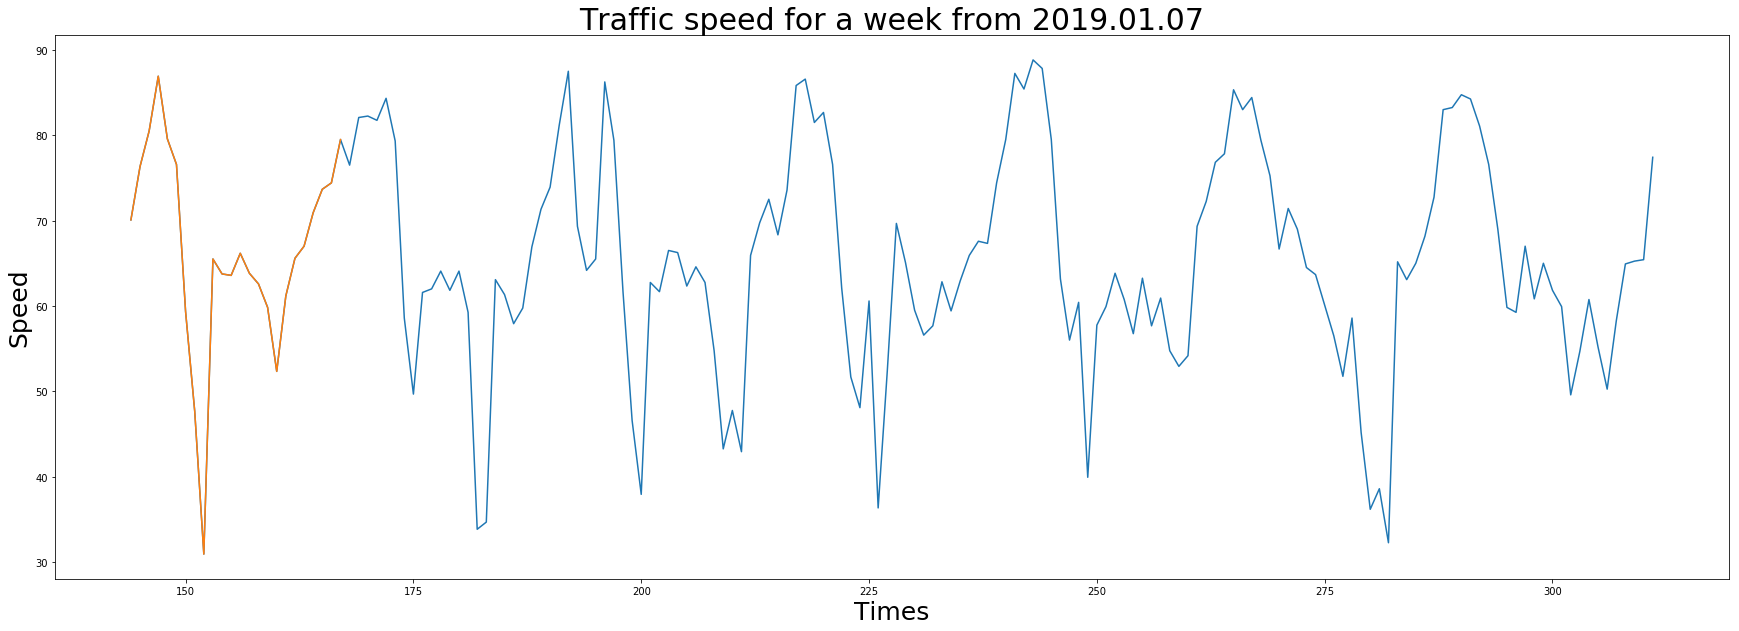

In [11]:
plt.rcParams["figure.figsize"] = (30, 10)

plt.plot(df_clean.loc[144: 311, "Speed"])
plt.plot(df_clean.loc[144: 167, "Speed"])
plt.title("Traffic speed for a week from 2019.01.07", fontsize = 30)
plt.xlabel("Times", fontsize = 25)
plt.ylabel("Speed", fontsize = 25)

<br>

- 위 그래프는 2019년 1월 8일 이후부터 일주일 간의 통행속도 그래프이다.
- 왼쪽 노란색 그래프는 2019년 1월 8일 하루 동안의 통행속도 그래프이다.
- 출퇴근 시간에 통행속도가 느려지는 "W"형태의 그래프를 볼 수 있다.
- 이 형태가 일주일 간 반복되는 것으로 보아, 본 데이터는 계절성(seasonal)의 특성을 가진다고 판단할 수 있다.


<br>

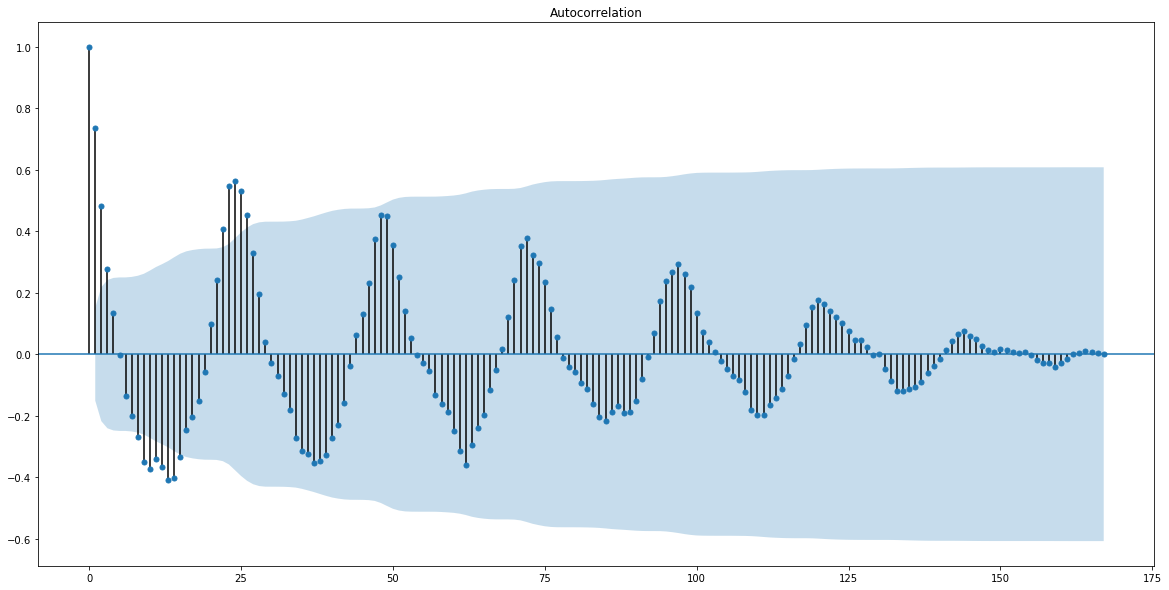

In [12]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    sm.tsa.graphics.plot_acf(df_clean.loc[144:311, "Speed"])
plt.show()

<br>

- ACF: Autocorrelation Function도 이 데이터가 계절성이 있음을 보여준다.
- 이러한 계절성을 제거하기 위해 먼저 차분을 하고 이 결과를 "SpeedLag1"에 할당한다.

<br>

In [13]:
df_clean["SpeedLag1"] = df_clean["Speed"].diff(periods = 24)
df_clean.head(30)

,Date/Time,NameOfStreet,LinkID,Direction,Speed,SpeedLag1
0,20190101-01시,내부순환로,1000002500,하행,71.86,NaN
1,20190101-02시,내부순환로,1000002500,하행,69.00,NaN
2,20190101-03시,내부순환로,1000002500,하행,82.17,NaN
3,20190101-04시,내부순환로,1000002500,하행,85.50,NaN
4,20190101-05시,내부순환로,1000002500,하행,85.33,NaN
5,20190101-06시,내부순환로,1000002500,하행,83.67,NaN
6,20190101-07시,내부순환로,1000002500,하행,80.58,NaN
7,20190101-08시,내부순환로,1000002500,하행,81.25,NaN
8,20190101-09시,내부순환로,1000002500,하행,80.42,NaN
9,20190101-10시,내부순환로,1000002500,하행,74.83,NaN


<br>

- 1차 차분한 통행속도 데이터를 시간에 따라 그래프로 표현한다.

<br>

Text(0, 0.5, 'Speed')

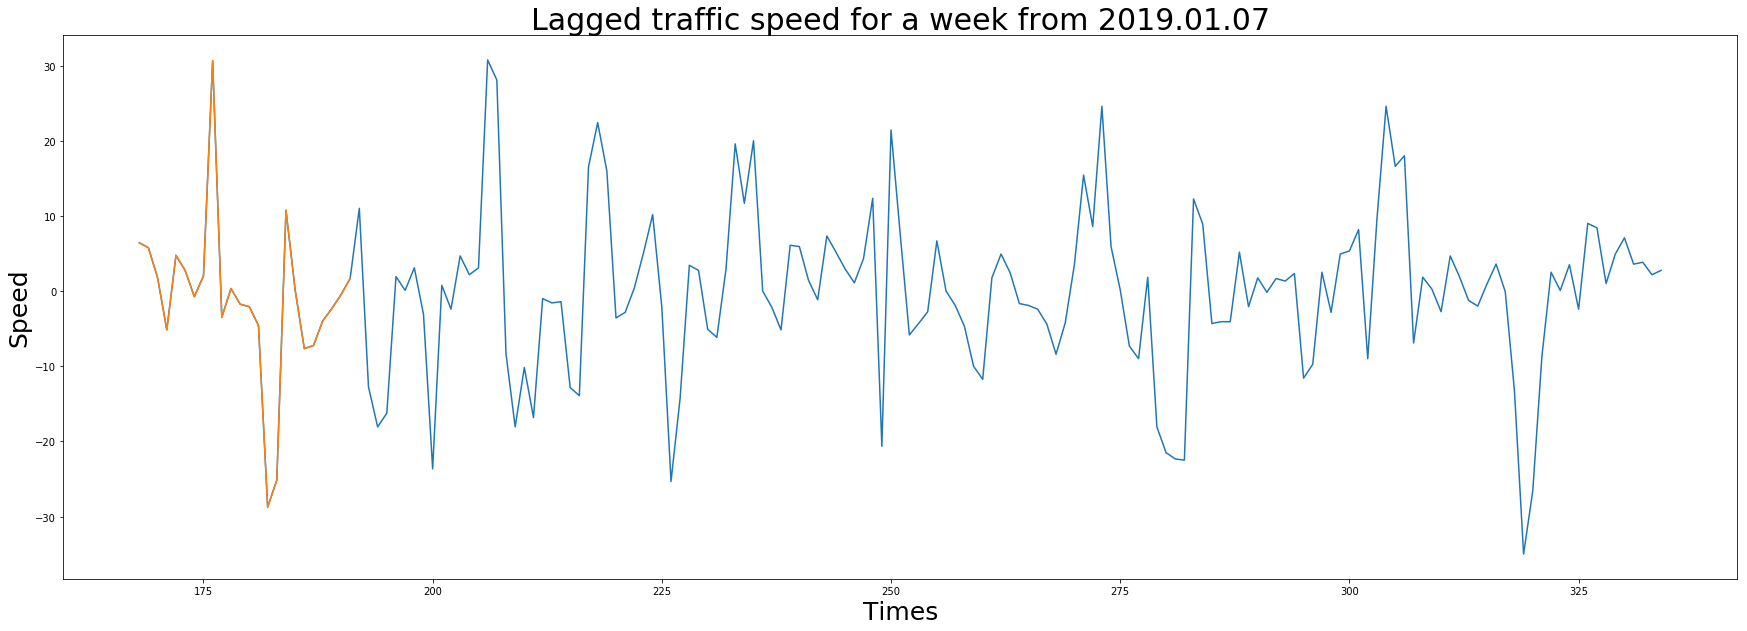

In [14]:
plt.rcParams["figure.figsize"] = (30, 10)

plt.plot(df_clean.loc[168:334, "SpeedLag1"])
plt.plot(df_clean.loc[168:191, "SpeedLag1"])

plt.title("Lagged traffic speed for a week from 2019.01.07", fontsize = 30)
plt.xlabel("Times", fontsize = 25)
plt.ylabel("Speed", fontsize = 25)

<br>

- 계절성을 제거한 데이터의 ACF: Autocorrelation Function이다. 

<br>

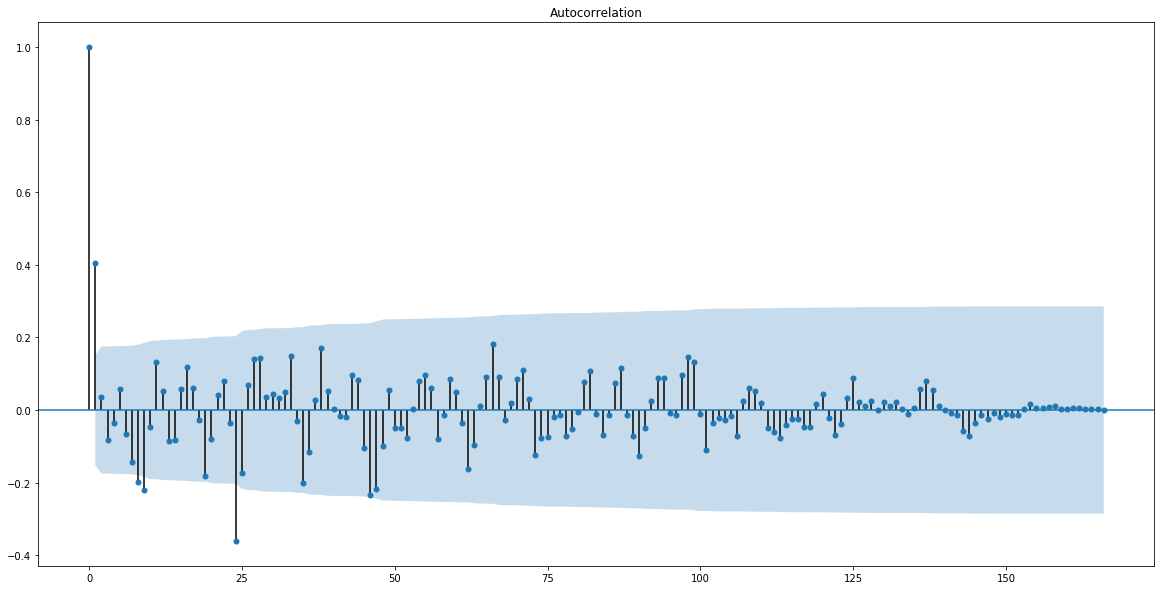

In [15]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    sm.tsa.graphics.plot_acf(df_clean.loc[168:334, "SpeedLag1"])
plt.show()

## (5) 분석결과 도출<br>

### 5-1) 가능한 모델 차수(order) 선정<br>

<br>
모델 선정은 SARIMA 모델의 차수(order)를 결정하는 것을 의미한다. 일반적인 ARIMA 모델의 차수 (p, i, q)는 차례로 AR 모델의 차수 AR(p), 차분의 횟수 i, 그리고 MA 모델의 차수 MA(q)를 뜻한다. SARIMA 모델의 차수는 ARIMA 모델 차수에서 계절성 차수(seasonal order)를 함께 고려한다. <br><br>
우선 acf와 pacf 그래프를 이용하여 가능한 모든 차수를 선정하고, 각 차수에 해당하는 다수의 모델을 만든다. 그 후 AIC(Akaike Information Criterion: 아카이케 정보기준) 값이 가장 낮은 모델을 예측 모델로 선정한다.
<br>

- 아래는 2019년 01월 08일부터 3일 간의 통행속도 데이터의 ACF 그래프이다.

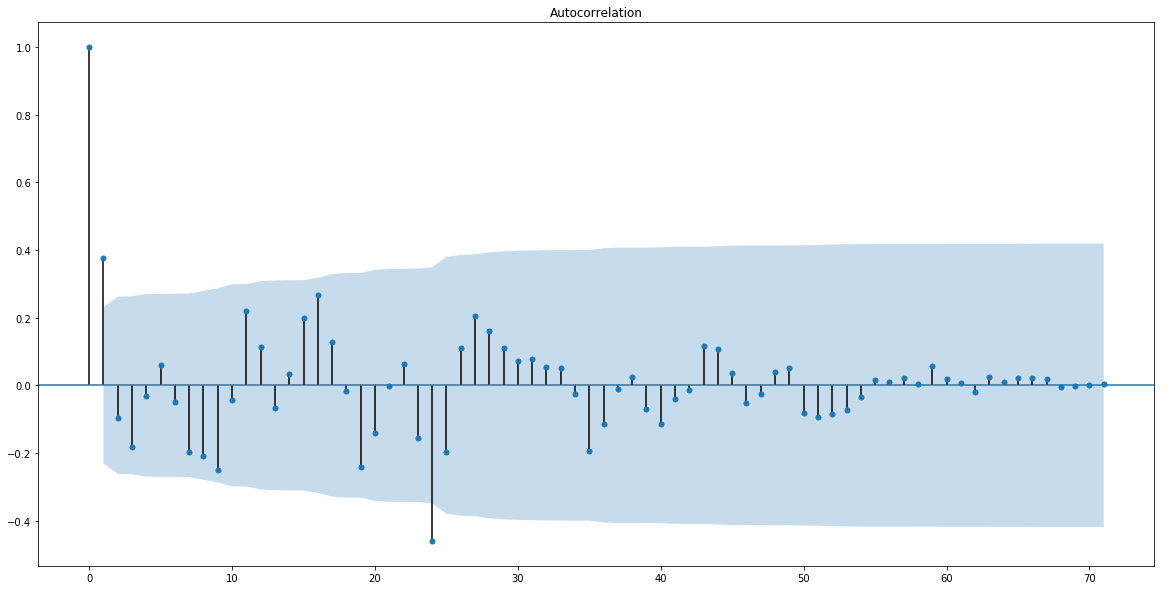

In [16]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    sm.tsa.graphics.plot_acf(df_clean.loc[168:239, "SpeedLag1"])
plt.show()

<br>

- ACF는 MA 모델의 차수를 결정하는 데 유용하다.
- 왼쪽의 두 번째 차수 이후로 대부분의 데이터가 오차범위 안에 위치한다.
- 오차범위 안에 위치하는 데이터는 autocorrelation coefficient가 0 이라는 의미이다.
- 따라서 가능한 <strong>MA의 차수는 1 또는 0</strong> 이다.
- 한편 그래프의 24번째 막대가 유의미하게 오차범위 밖에 위치하는 것을 볼 수 있다.
- 따라서 가능한 <strong>계절성 MA의 차수도 1 또는 0</strong> 이다.

<br>

- 아래는 2019년 1월 8일부터 3일 간 통행속도 데이터의 PACF 그래프이다.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


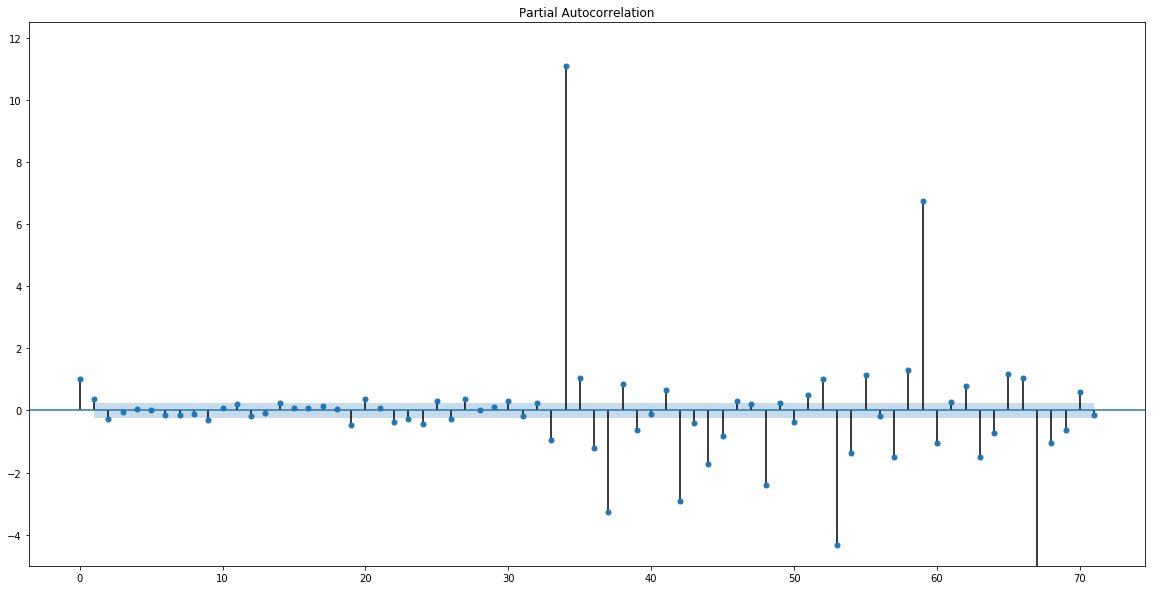

In [17]:
with plt.rc_context():
    plt.rc("figure", figsize=(20, 10))
    sm.tsa.graphics.plot_pacf(df_clean.loc[168:239, "SpeedLag1"])
plt.ylim(top = 12.5)
plt.ylim(bottom = -5)
plt.show()

<br>

- 가능한 <strong>AR 모델의 차수는 1 혹은 0</strong> 이다.
- 가능한 계절성 AR 차수는 

<br>

### 5-2) 모델 검증<br>

<br>

- 위에서 ACF와 PACF의 그래프를 살펴본 결과, 세 가지 가능한 SARIMA 모델의 차수를 선정할 수 있었다. 그 결과는 아래와 같다.

<br>

In [18]:
data = [["Mod1", 1, 0, 1, 1, 1, 0],["Mod2", 1, 0, 0, 1, 1, 1], ["Mod3", 1, 0, 1, 1, 1, 1]]
dataFrame = pd.DataFrame(data, columns = ["Model", 
                                          "Order of AR", 
                                          "Order of difference", 
                                          "Order of MA", 
                                          "Order of Seasonal AR",
                                         "Order of Sesonal difference", 
                                          "Order of Seasonal MA"])
dataFrame.set_index("Model", inplace = True)
dataFrame

,Order of AR,Order of difference,Order of MA,Order of Seasonal AR,Order of Sesonal difference,Order of Seasonal MA
Model,,,,,,
Mod1,1,0,1,1,1,0
Mod2,1,0,0,1,1,1
Mod3,1,0,1,1,1,1


<br>

- 위 차수를 바탕으로 세 개의 모델을 만들었고, 각 모델에 대한 요약은 아래와 같다.

<br>

In [19]:
Mod1 = sm.tsa.SARIMAX(df_clean.loc[144:311, "Speed"],
                       order = (1, 0, 1), seasonal_order = (1, 1, 0, 24))
test1 = Mod1.fit()
print(test1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Speed   No. Observations:                  168
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 24)   Log Likelihood                -516.970
Date:                            Mon, 10 Jun 2019   AIC                           1041.939
Time:                                    22:29:54   BIC                           1053.818
Sample:                                         0   HQIC                          1046.766
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2880      0.188      1.534      0.125      -0.080       0.656
ma.L1          0.1048      0.212   

<br>

- 오른쪽 상단에서 AIC 값을 확인할 수 있다.
- 첫 번째 모델의 AIC는 1041.939이다.

<br>

In [20]:
Mod2 = sm.tsa.SARIMAX(df_clean.loc[144:311, "Speed"],
                       order = (1, 0, 0), seasonal_order = (1, 1, 1, 24))
test2 = Mod2.fit()
print(test2.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Speed   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 24)   Log Likelihood                -506.546
Date:                            Mon, 10 Jun 2019   AIC                           1021.092
Time:                                    22:29:56   BIC                           1032.971
Sample:                                         0   HQIC                          1025.919
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4023      0.054      7.390      0.000       0.296       0.509
ar.S.L24      -0.0812      0.169   

<br>

- 두 번째 모델의 AIC 값은 1021.092이다.

<br>

In [21]:
Mod3 = sm.tsa.SARIMAX(df_clean.loc[144:311, "Speed"],
                       order = (1, 0, 1), seasonal_order = (1, 1, 1, 24))
test3 = Mod3.fit()
print(test3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Speed   No. Observations:                  168
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 24)   Log Likelihood                -506.024
Date:                            Mon, 10 Jun 2019   AIC                           1022.048
Time:                                    22:29:57   BIC                           1036.897
Sample:                                         0   HQIC                          1028.081
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2566      0.178      1.445      0.148      -0.091       0.605
ma.L1          0.1777      0.200   

<br>

- 세 번째 모델의 AIC 값은 1022.048이다.

<br>

### 5-3) 모델 선정<br>

<br>

- 검증 결과 두 번째 모델의 AIC 값이 가장 작았고, 이를 통해 해당 모델이 다른 모델에 비해 적합하다고 판단했다.
- 각 모델의 AIC 값을 정리한 표는 아래와 같다.

<br>

In [22]:
dataAIC = [["Mod1", 1, 0, 1, 1, 1, 0, 1041.939],["Mod2", 1, 0, 0, 1, 1, 1, 1021.092], ["Mod3", 1, 0, 1, 1, 1, 1, 1022.048]]
dataFrameAIC = pd.DataFrame(dataAIC, columns = ["Model", 
                                          "Order of AR", 
                                          "Order of difference", 
                                          "Order of MA", 
                                          "Order of Seasonal AR",
                                         "Order of Sesonal difference", 
                                          "Order of Seasonal MA",
                                         "AIC"])
dataFrameAIC.set_index("Model", inplace = True)
dataFrameAIC

,Order of AR,Order of difference,Order of MA,Order of Seasonal AR,Order of Sesonal difference,Order of Seasonal MA,AIC
Model,,,,,,,
Mod1,1,0,1,1,1,0,1041.939
Mod2,1,0,0,1,1,1,1021.092
Mod3,1,0,1,1,1,1,1022.048


<br>

- 훈련 데이터(train data)를 두 번째 모델에 피팅(fitting)한다.

<br>

In [23]:
Model = sm.tsa.SARIMAX(df_clean.loc[144:311, "Speed"],
                       order = (1, 0, 0), seasonal_order = (1, 1, 1, 24))
ModelFit = Model.fit()
print(ModelFit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Speed   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 24)   Log Likelihood                -506.546
Date:                            Mon, 10 Jun 2019   AIC                           1021.092
Time:                                    22:29:59   BIC                           1032.971
Sample:                                         0   HQIC                          1025.919
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4023      0.054      7.390      0.000       0.296       0.509
ar.S.L24      -0.0812      0.169   

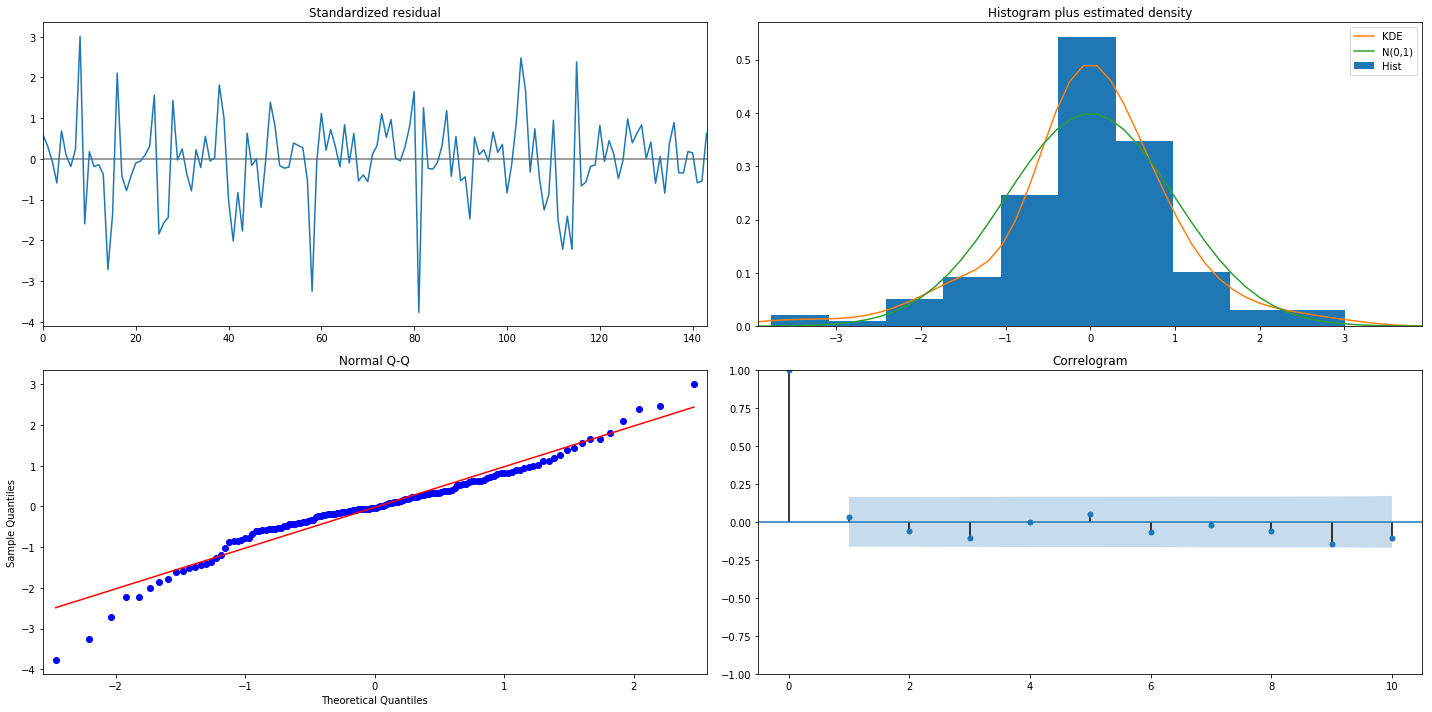

In [24]:
with plt.rc_context():
    plt.rc("figure", figsize=(20,10))
    ModelFit.plot_diagnostics()
    plt.tight_layout()
plt.show()

## (6) 결론

<br>

- 완성한 모델을 이용하여 예측한 결과는 아래와 같다.
- 주황색 그래프는 예측값을, 파란색 그래프는 기존 데이터 값을 나타낸다.

<br>

In [25]:
ModelPredict = sm.tsa.SARIMAX(df_clean.loc[144:479, "Speed"],
                    order = (1, 0, 0), seasonal_order = (1, 1, 1, 24))
result = ModelPredict.filter(ModelFit.params)
predict = result.get_prediction()
predict_ci = predict.conf_int()

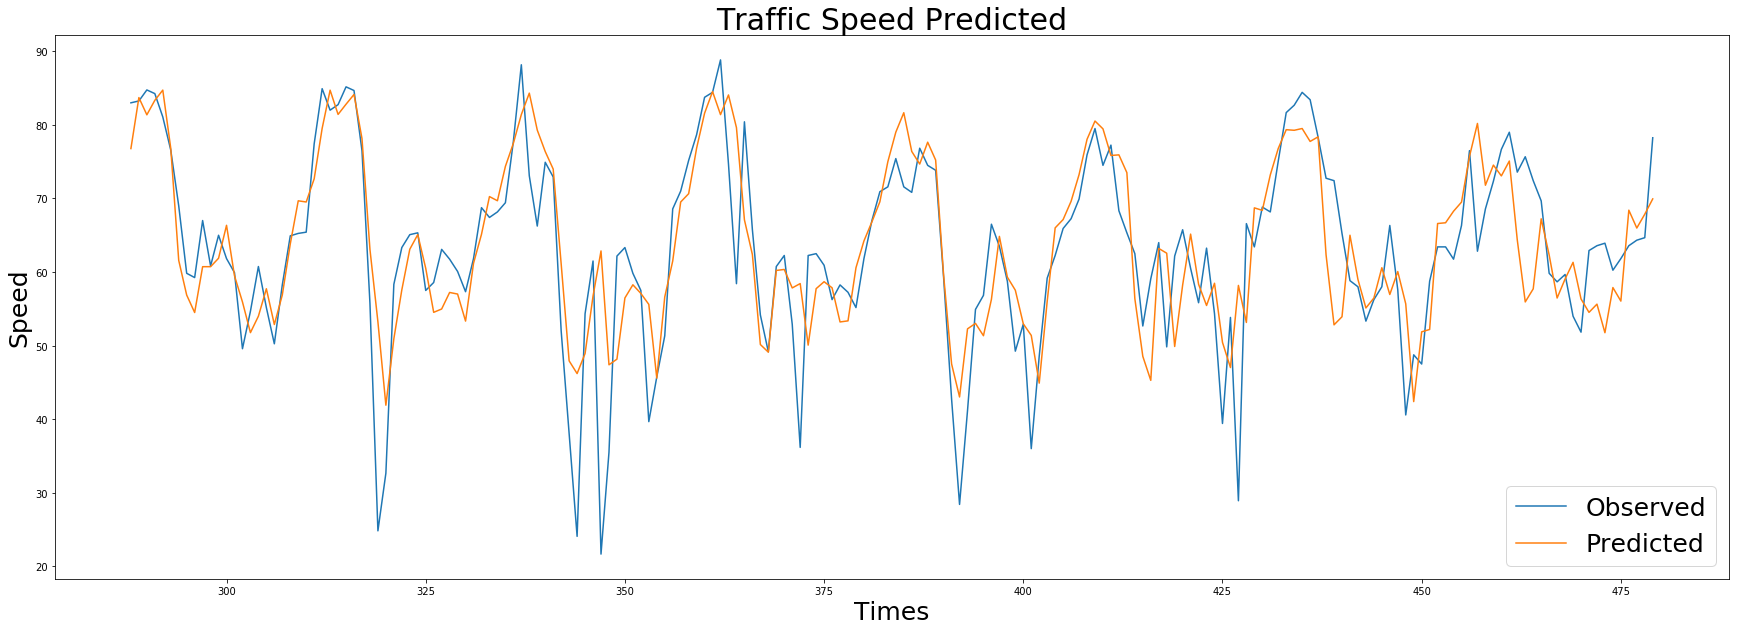

In [26]:
plt.plot(df_clean.loc[288:479, "Speed"], label = "Observed")
plt.plot(predict.predicted_mean, label = "Predicted")
plt.title("Traffic Speed Predicted", fontsize = 30)
plt.xlabel("Times", fontsize = 25)
plt.ylabel("Speed", fontsize = 25)
plt.legend(loc = 4, prop = {"size": 25})

<br>

- 아래는 관측치와 예측치(예측 모델을 사용하여 얻는 결과)를 비교하는 표이다.
- 상위 30행만 표시하였다.

<br>

In [27]:
dataSeries = pd.DataFrame(dict(Date_Time = df_clean.loc[288:479, "Date/Time"],
                               Observed = df_clean.loc[288:479, "Speed"],
                               Predicted = predict.predicted_mean))
dataSeries.set_index("Date_Time", inplace = True)
dataSeries.head(30)

,Observed,Predicted
Date_Time,,
20190113-01시,83.00,76.781115
20190113-02시,83.25,83.709088
20190113-03시,84.75,81.369215
20190113-04시,84.25,83.336459
20190113-05시,81.08,84.725935
20190113-06시,76.58,76.814414
20190113-07시,69.00,61.584670
20190113-08시,59.83,56.871409
20190113-09시,59.25,54.499059


<br>

- 오차함수의 그래프는 아래와 같다.

<br>

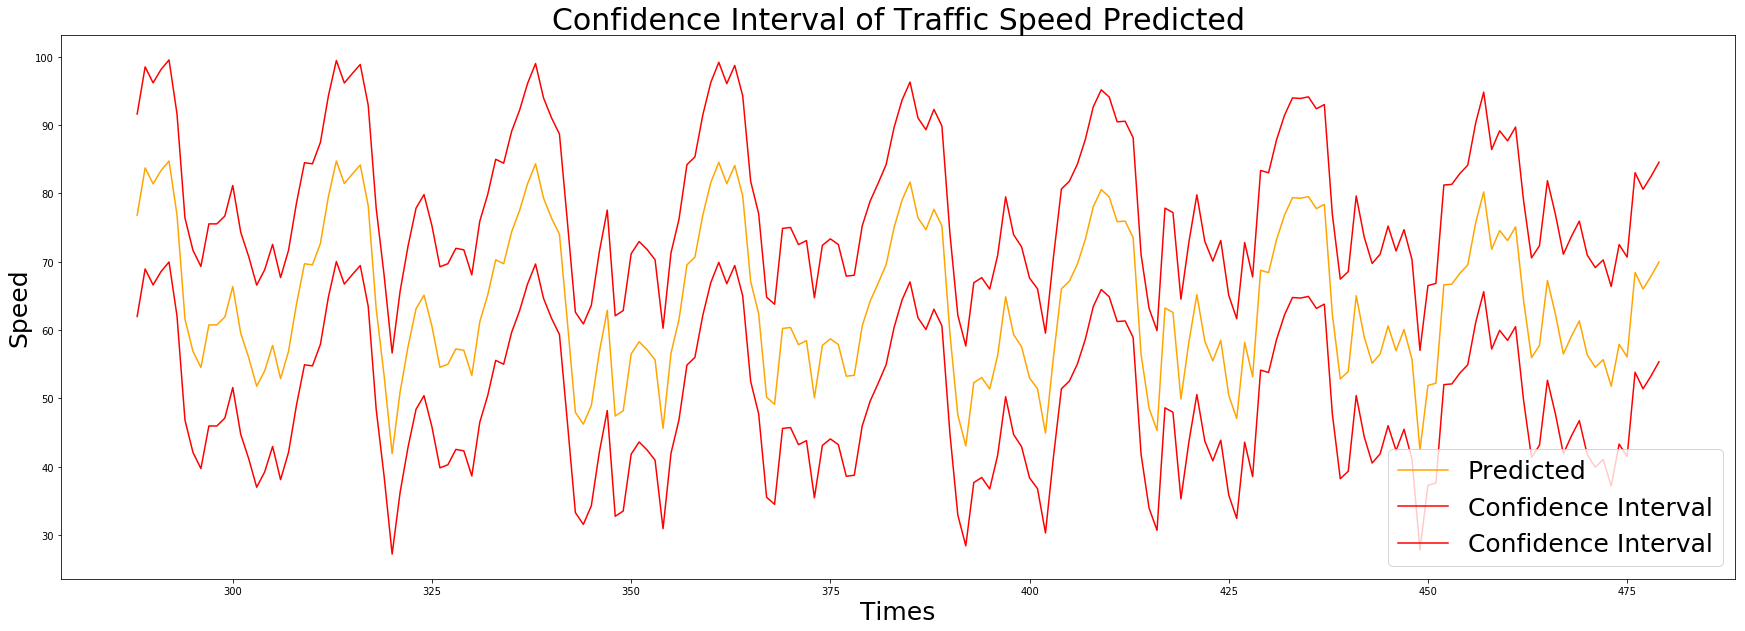

In [28]:
plt.plot(predict.predicted_mean, color = "orange", label = "Predicted")
plt.plot(predict_ci, color = "red", label = "Confidence Interval")
plt.title("Confidence Interval of Traffic Speed Predicted", fontsize = 30)
plt.xlabel("Times", fontsize = 25)
plt.ylabel("Speed", fontsize = 25)
plt.legend(loc = 4, prop = {"size" : 25})

## (7) myPandas

<br>

- 지금까지의 분석에 이용한 pandas의 method를 스스로 짜보았다.
- class 명은 Tensor로 하였다.
- 아래는 위에서 panas를 이용해 시행한 데이터 분석을 myPandas로 시행한 것이다.

<br>

In [29]:
import Tensor as tf

In [30]:
df2 = tf.Tensor().readFile("2019_01_traffic.csv")
df_Clean =  df2[["Index", "일자", "도로명", "링크아이디", "기능유형구분", "01시", "02시", "03시", "04시", "05시", "06시", "07시",
      "08시", "09시", "10시", "11시", "12시", "13시", "14시", "15시", "16시", "17시", 
      "18시", "19시", "20시", "21시", "22시", "23시", "24시"]]
df_Clean = df_Clean.rename(columns = {"일자": "Date", "도로명": "Street", "링크아이디": "LinkID", "기능유형구분": "Type"})
df_Clean = df_Clean.capture("Type", "도시고속도로")
df_Clean = df_Clean.melt(var_vars=["Date", "LinkID", "Street", "Type"], 
        value_vars = ["01시", "02시", "03시", "04시", "05시", "06시", "07시",
      "08시", "09시", "10시", "11시", "12시", "13시", "14시", "15시", "16시", "17시", 
      "18시", "19시", "20시", "21시", "22시", "23시", "24시"], var_name = "Time",
       value_name = "Speed")
df_Clean = df_Clean.capture("LinkID", "1000002500")

In [31]:
df_Clean.printDict()

Index  Date      Street           LinkID      Type                Time   Speed  

0      20190101  내부순환로            1000002500  도시고속도로              01시    71.86  
1      20190101  내부순환로            1000002500  도시고속도로              02시    69     
2      20190101  내부순환로            1000002500  도시고속도로              03시    82.17  
3      20190101  내부순환로            1000002500  도시고속도로              04시    85.5   
4      20190101  내부순환로            1000002500  도시고속도로              05시    85.33  


In [32]:
Model = sm.tsa.SARIMAX(df_Clean.loc([144, 311], "Speed"), order = (1, 0, 0), seasonal_order = (1, 1, 1, 24))
ModelFit = Model.fit()
print(ModelFit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  167
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 24)   Log Likelihood                -503.407
Date:                            Mon, 10 Jun 2019   AIC                           1014.814
Time:                                    22:30:07   BIC                           1026.665
Sample:                                         0   HQIC                          1019.629
                                            - 167                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4053      0.055      7.409      0.000       0.298       0.512
ar.S.L24      -0.0812      0.170   

In [33]:
ModelPredict = sm.tsa.SARIMAX(df_Clean.loc([144, 479], "Speed"),
                    order = (1, 0, 0), seasonal_order = (1, 1, 1, 24))
result = ModelPredict.filter(ModelFit.params)
predict = result.get_prediction()
predict_ci = predict.conf_int()

(25, 200)

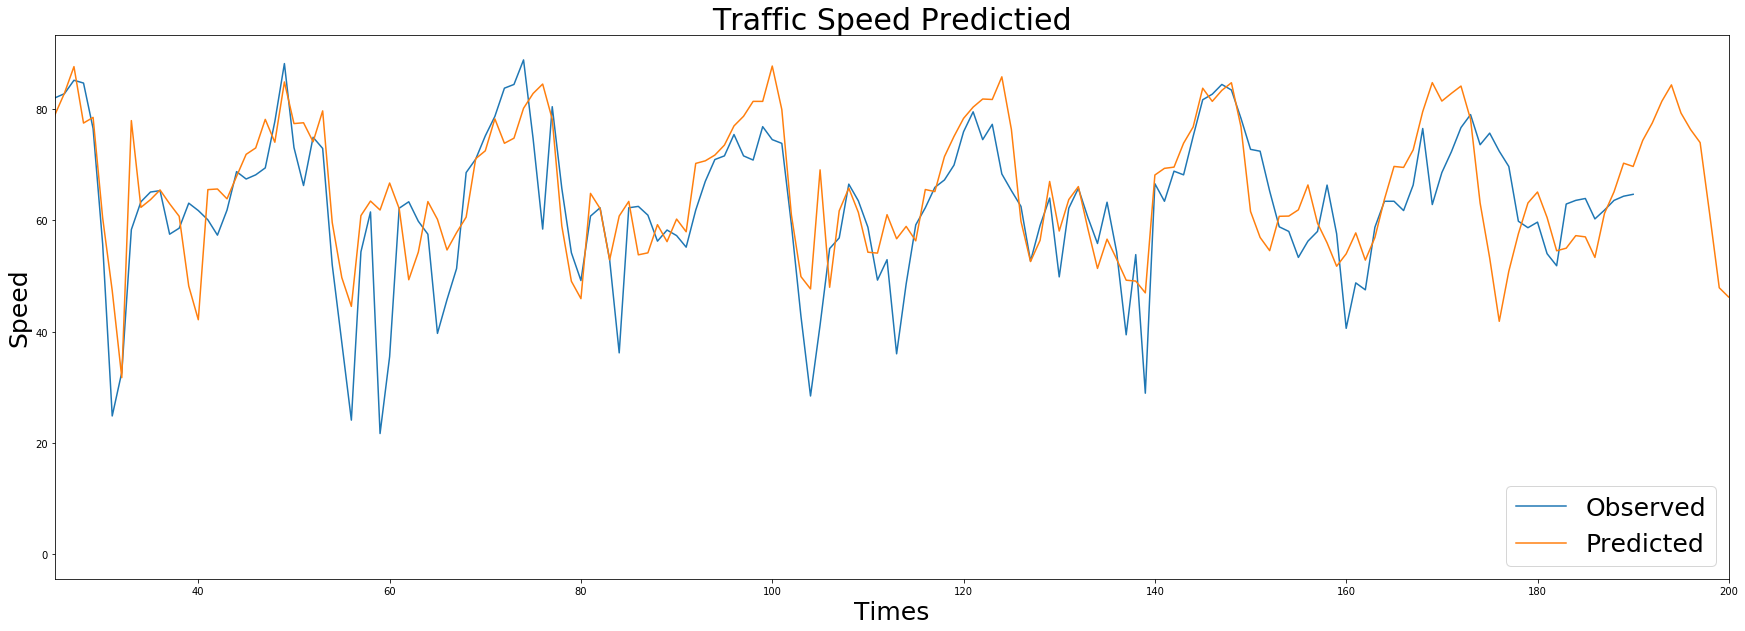

In [34]:
plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(df_Clean.loc([288, 479], "Speed"), label = "Observed")
plt.plot(predict.predicted_mean, label = "Predicted")
plt.title("Traffic Speed Predictied", fontsize = 30)
plt.xlabel("Times", fontsize = 25)
plt.ylabel("Speed", fontsize = 25)
plt.legend(loc = 4, prop = {"size": 25})
plt.xlim(25, 200)

## (8) 참고문헌

- 이기석, [Basic Econometrics with SAS Applications], Kyung Hee University Press, 2005, p.79 ~ p.90
- Douglas C.Montgomery, [Introduction to Time Series Analysis and Forecasting], Wiley Interscience, 2008, p.25 ~ p.34
- Genshiro Kitagawa, [Introduction to Time Series Modeling], CRC Press, 2010, p.8 ~ p.12

## (9) 별첨1: (3)의 획득한 데이터 원본

- 획득한 데이터 원본의 상위 50행입니다.

In [35]:
df.head(50)

,일자,요일,도로명,링크아이디,시점명,종점명,방향,거리,차선수,기능유형구분,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,20190101,화,4.19로,1080012200,아카데미하우스,국립4.19묘지,상행,1179,1,보조간선도로,...,39.92,39.04,54.17,47.62,34.24,43.74,34.32,48.70,48.30,50.87
1,20190101,화,4.19로,1080012800,국립4.19묘지,국립4.19묘지입구,상행,352,1,보조간선도로,...,14.30,12.90,11.82,13.35,13.73,17.36,15.34,18.02,19.97,21.85
2,20190101,화,4.19로,1080012700,국립4.19묘지입구,국립4.19묘지,하행,354,2,보조간선도로,...,20.26,18.05,20.99,22.02,20.61,23.01,23.21,23.82,25.37,25.35
3,20190101,화,4.19로,1080012100,국립4.19묘지,아카데미하우스,하행,1190,2,보조간선도로,...,43.59,44.07,62.28,61.14,47.81,50.33,46.09,49.38,51.10,39.82
4,20190101,화,가락로,1230024700,방이초교,방이동고분군,상행,844,1,기타도로,...,19.02,23.67,25.47,15.53,18.35,13.99,18.32,21.83,17.64,21.38
5,20190101,화,가락로,1230019500,방이동고분군,송파한양아파트,상행,416,1,기타도로,...,23.04,23.94,27.17,23.80,26.61,28.91,27.23,26.33,27.28,28.08
6,20190101,화,가락로,1230016300,송파한양아파트,송파사거리,상행,478,1,기타도로,...,18.21,20.18,22.18,18.60,19.53,20.69,20.42,22.89,22.19,21.90
7,20190101,화,가락로,1230014100,송파사거리,배명고교,상행,1288,1,기타도로,...,22.08,20.75,17.16,23.00,17.58,18.92,21.25,26.33,25.92,25.01
8,20190101,화,가락로,1230014200,배명고교,송파사거리,하행,1288,1,기타도로,...,22.42,20.83,20.58,22.17,22.92,23.83,21.92,27.83,19.25,24.24
9,20190101,화,가락로,1230016400,송파사거리,송파한양아파트,하행,484,1,기타도로,...,23.44,23.11,24.06,23.10,22.73,23.68,23.32,23.99,23.78,26.66


## (10) 별첨2: (4)의 가공된 데이터 원본

- 가공된 데이터 원본의 상위 50행입니다.

In [36]:
df_clean.head(50)

,Date/Time,NameOfStreet,LinkID,Direction,Speed,SpeedLag1
0,20190101-01시,내부순환로,1000002500,하행,71.86,NaN
1,20190101-02시,내부순환로,1000002500,하행,69.00,NaN
2,20190101-03시,내부순환로,1000002500,하행,82.17,NaN
3,20190101-04시,내부순환로,1000002500,하행,85.50,NaN
4,20190101-05시,내부순환로,1000002500,하행,85.33,NaN
5,20190101-06시,내부순환로,1000002500,하행,83.67,NaN
6,20190101-07시,내부순환로,1000002500,하행,80.58,NaN
7,20190101-08시,내부순환로,1000002500,하행,81.25,NaN
8,20190101-09시,내부순환로,1000002500,하행,80.42,NaN
9,20190101-10시,내부순환로,1000002500,하행,74.83,NaN


## (11) 별첨3: (3)을 (4)로 변환하는 등의 작업을 위하여 본인이 직접 개발한 Python 소스코드 원본

In [37]:
import numpy as np

class Tensor:
    def __init__(self, dictionary = {}, value = [[]], key = []):
        self._dataDict = dictionary
        self._keySize = len(self._dataDict.keys())
        self._row = value
        self._col = key
    def dictInitializer(self, columns):
        # dictionary의 key를 column 리스트의 값으로, value를 빈 리스트로 초기화합니다.
        dictionary = {}
        for i in range(len(columns)):
            dictionary[columns[i]] = []
        return dictionary
    def DataFrame(self, data, columns):
        """
        Table의 row가 될 2차원 리스트 형태의 data와 columns을 갖고 있는 1차원 리스트 column을 입력인자로 받는다.
        columns의 원소들은 dictionary의 key가 되고, 2차원 리스트의 데이터는 각 key의 value가 된다.
        dictionary를 생성할 때 index를 함께 추가한다.
        """
        if (isinstance(data[0], list) and len(data[0]) == len(columns)):
            columns.insert(0, "Index")
            dictionary = self.dictInitializer(columns)
            index = 0
            for _list in data:
                _list.insert(0, index)
                for i in range(len(columns)):
                    dictionary[columns[i]].append(_list[i])
                index += 1
            return Tensor(dictionary, data, columns)
        elif (isinstance(data[0], list) == False):
            print("입력한 데이터가 2차원 리스트가 아닙니다.")
        else:
            print("입력한 데이터의 수와 컬럼의 수가 맞지 않습니다.")               
    def readFile(self, nameOfFile):
        """
        csv 파일을 읽어오는 함수이다.
        파일명을 입력인자로 받는다.
        파일의 맨 첫 row를 단어 수준으로 나누어 columns라는 리스트에 append한다.
        그 후 두 번째 row부터 하나의 리스트로 묶고, 그 리스트를 data라는 리스트에 append하여 2차원 리스트를 만든다.
        리턴값은 DataFrame()이며, 앞서 만든 data와 columns이 입력인자로 쓰인다.
        """
        data = []
        columns = []
        file = open(nameOfFile, 'r', encoding = 'utf-8')
        columns = file.readline().replace('\n', ',').split(',')
        columns.pop()
        
        for line in file:
            line = line.replace('\n', ',').split(',')
            line.pop()
            data.append(line)
        file.close()
        return self.DataFrame(data, columns)
    def printDict(self, length = 5):
        """
        클래스의 atrribute인 _dataDict를 table 형태로 출력하는 함수이다.
        출력시에 한글은 한 글자에 2bytes로 인식하도록 하고 싶으나, 해결하지 못 했다.
        따라서 출력 결과가 조금씩 어긋나는 문제가 있다.
        """

        if length > len(self._dataDict["Index"]):
            length = len(self._dataDict["Index"])
        
        widthList = []
        for key, value in zip(self._dataDict.keys(), self._row[0]):
            if len(str(key).encode()) > len(str(value).encode()):
                widthList.append(len(str(key).encode()))
            else:
                widthList.append(len(str(value).encode()))
        
        for key, width in zip(self._dataDict.keys(), widthList):
            print("{:<{width}}".format(key, width = width), end = '  ')
        print(end = '\n\n')
        for i in range(length):
            for key, width in zip(self._dataDict.keys(), widthList):
                print("{:<{width}}".format(self._dataDict[key][i], width = width), end = '  ')
            print()
    def __getitem__(self, keyInput):
        """
        python operator 중 []를 재정의하였다.
        keyInpur이 문자열일 경우 입력받은 key에 해당하는 dictionary의 value를 반환한다.
        keyInput이 리스트일 경우 그 리스트의 원소(key)에 해당하는 dionary의 value만을 선별하여 새로운 Tensor object를 반환한다.
        """
        if isinstance(keyInput, str):
            return self._dataDict[keyInput]
        elif isinstance(keyInput, list):
            temp = {}
            for key in keyInput:
                temp[key] = self._dataDict[key]
            key = []
            value = []
            for k, v in temp.items():
                key.append(k)
                value.append(v)
            return Tensor(temp, value, key)
        else :
            print("문자열 혹은 리스트가 아닙니다.")
    def rename(self, columns):
        """
        columns의 이름을 재정의하는 함수이다.
        """
        for old, new in columns.items():
            self._dataDict[new] = self._dataDict.pop(old)
        return Tensor(self._dataDict, list(self._dataDict.values()), list(self._dataDict.keys()))
    def capture(self, key, target):
        """
        입력받은 key에 해당하는 dictionary의 value 중 target에 해당하는 value만을 반환하는 함수이다.
        해당하는 value를 찾을 때 index 값을 임시로 저장하고, 이 index 값에 해당하는 모든 row도 찾는다.
        """
        listSearch = self._dataDict[key]
        indexMatch = []
        self._col.remove("Index")
        keys = self._col
        data = []
        for i in range(len(listSearch)):
            if listSearch[i] == target:
                indexMatch.append(i)
        for index in indexMatch:
            temp = []
            for key in keys:
                temp.append(self._dataDict[key][index])
            data.append(temp)
        return self.DataFrame(data, keys)
    def melt(self, var_vars, value_vars, var_name, value_name):
        """
        columns을 row로 변환하는 함수이다.
        var_vars는 현재 columns 중 변환하지 않을 columns의 리스트이다.
        value_vars는 현재 columns 중 row로 변환할 columns의 리스트이다.
        var_name은 row로 변환한 columns의 key 값으로 사용될 이름이다.
        value_name은 row로 변환한 columns의 value에 해당하는 값들이 갖는 key값이다.
        """
        varToValue = []
        valueToValue = []
        tempIndex = len(value_vars)
        oldIndex = len(self._dataDict["Index"])
        newIndex = oldIndex
        for i in range(oldIndex):
            for value in value_vars:
                varToValue.append(value)
                valueToValue.append(self._dataDict[value][i])
                
            for value in var_vars:
                for j in range(len(value_vars) - 1):
                    self._dataDict[value].insert(tempIndex * i, self._dataDict[value][tempIndex * i])
                    if value == var_vars[0]:
                        self._dataDict["Index"].append(newIndex)
                        newIndex += 1
        
        for value in value_vars:
            self._dataDict.pop(value)
            
        self._dataDict[var_name] = varToValue
        self._dataDict[value_name] = valueToValue

        index = self._dataDict["Index"]
        keys = list(self._dataDict.keys())
        keys.remove("Index")
        data = []
        for i in range(len(index)):
            temp = []
            for key in keys:
                temp.append(self._dataDict[key][i])
            data.append(temp)
        return self.DataFrame(data, keys)
    def loc(self, row, columns):
        """
        table에서 특정 row와 columns에 해당하는 데이터를 찾아 반환하는 함수이다.
        """

        if isinstance(row, list):
            begin, end = row
        
        result = []
        while begin != end:
            result.append(float(self._dataDict[columns][begin]))
            begin += 1
        return np.array(result)
    def sort_values(self, target):
        """
        target을 기준으로 dictionary를 정렬하는 함수이다.
        taget이 리스트이면 차례대로 기준을 적용해 정렬한다.
        Date와 Time을 기준으로 정렬한다고 가정하면,
            1) 먼저 Date를 기준으로 모든 dictionary를 정렬한다.
            2) 정렬된 Date column이 섞이지 않는 조건 내에서 Time을 기준으로 정렬한다.
        target을 최대 2개까지만 받을 수 있다는 것이 한계이다.
        """

        if isinstance(target, str):
            option = 0
        if isinstance(target, list):
            option = 1
            target, target2 = target
        index = list(np.argsort(self._dataDict[target]))
        keys = list(self._dataDict.keys())
        keys.remove("Index")
        data = []
        for i in index:
            temp = []
            for key in keys:
                temp.append(self._dataDict[key][i])
            data.append(temp)
        if option == 0:
            return self.DataFrame(data, keys)
        else:
            index.clear()
            diffValueIndex = []
            sortedList = self._dataDict[target]
            for i in range(len(sortedList) - 1):
                if sortedList[i] != sortedList[i + 1]:
                    diffValueIndex.append(i + 1)
            diffValueIndex.insert(0, 0)
            for i in range(len(diffValueIndex)):
                if i != len(diffValueIndex) - 1:
                    index += list(np.argsort(self._dataDict[target2][diffValueIndex[i]: diffValueIndex[i + 1]]))
                else:
                    index += list(np.argsort(self._dataDict[target2][diffValueIndex[i]:]))
            data.clear()
            for  i in range(len(index)):
                temp = []
                for key in keys:
                    temp.append(self._dataDict[key][i])
                data.append(temp)
            return self.DataFrame(data, keys)